# Sales Forecasting

Sales team provided a data of 1115 stores. The objective is to predict future daily Sales based on some features like: Store size, Distance away from competition, School, Store promotions, State Holidays, Type of product etc.

# Importing Libraries and Dataset

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [5]:
sales_train_df = pd.read_csv("train.csv")

/tmp/ipykernel_3881/3367998026.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train_df = pd.read_csv("train.csv")


In [6]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


- Store: Represents the ID or number assigned to each store.
- DayOfWeek: Indicates the day of the week (1 for Monday, 2 for Tuesday, and so on).
- Date: Specifies the date of the recorded sales.
- Sales: Denotes the total sales made by the store on a particular date.
- Customers: Represents the total number of customers who made purchases at the store on the given date.
- Open: Indicates whether the store was open (1 for open, 0 for closed) on the specified date.
- Promo: Represents whether there was a promotion or special offer running on the specified date (1 for yes, 0 for no).
- StateHoliday: Specifies whether the day was a state holiday (1 for yes, 0 for no) and for yes, there are three sub-categories (a =  Public Holiday, b= Easter Holiday, c= Christmas).
- SchoolHoliday: Indicates whether the (Store, Date) was was affected by the closure of schools and school holiday (1 for yes, 0 for no).

In [7]:
sales_train_df.tail(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017199,1106,2,2013-01-01,0,0,0,0,a,1
1017200,1107,2,2013-01-01,0,0,0,0,a,1
1017201,1108,2,2013-01-01,0,0,0,0,a,1
1017202,1109,2,2013-01-01,0,0,0,0,a,1
1017203,1110,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [8]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


- 9 columns in total.
- 8 features, each contains 1017209 data points.
- 1 target variable (sales).

In [9]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


Key highlights:

- On average, there were around 663 customers per store, with sales averaging around €5,774 per day.
- The number of customers and sales per day varied widely, as indicated by the high standard deviations.
- Stores were typically open 83% of the time and had promotions about 38% of the time.
- School holidays were less common, occurring only about 18% of the time.
- The minimum sales value is €0, indicating days when no sales were recorded.
- The maximum sales value is €41,551, indicating very high sales on certain days.
- The majority of days (75%) had sales below €7,856.

In [10]:
# Let's find out about the day when they had maximum sales.

sales_train_df.loc[sales_train_df["Sales"] == 41551]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
44393,909,1,2015-06-22,41551,1721,1,0,0,0


- This particular day recorded the highest sales of €41,551 and customer traffic (1,721 customers) for Store 909, despite there being no ongoing promotion and no holiday (neither state nor school holiday).
- The store was open on this day, which likely contributed to the high sales and foot traffic.

In [11]:
# Let's find out about the day when they had maximum Customers.

sales_train_df.loc[sales_train_df["Customers"] == 7388]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
993496,817,2,2013-01-22,27190,7388,1,1,0,0


Key highlights and comparision to Max. Sales:

- The sales for Store 817 on January 22, 2013, are €27,190, which is lower than the maximum sales value of €41,551.
- However, despite the lower sales figure, this day recorded the maximum number of customers, with 7,388 customers compared to the 1,721 customers in the maximum sales data point.
- The presence of a promotion on January 22, 2013, might have contributed to the high customer turnout and sales figures, despite being lower than the maximum sales value.

The disparity in customer numbers between the two days indicates that factors such as promotional strategies, product offerings, or local events may have influenced customer behavior and sales outcomes differently.

In [12]:
# Import Store information data

store_info_df = pd.read_csv("store.csv")

In [13]:
store_info_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


- Store: Represents the unique ID assigned to each store.
- StoreType: Indicates the type of store. This could represent different categories (a, b, c, d).
- Assortment: a= basic, b= extra, c= extended.
- CompetitonDistance (meters): Distance to closest competitor store.
- CompetitionOpenSince[Month/Year]: Date when competiton was open.
- Promo2: Indicates whether the store is participating in a promotional program (1 for yes, 0 for no).
- Promo2SinceWeek and Promo2SinceYear: Specify the week and year when the store started participating in Promo2, if applicable.
- PromoInterval: Provides the intervals at which Promo2 is offered. For example, "Jan,Apr,Jul,Oct" suggests promotions are offered in January, April, July, and October.

In [14]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


The dataset contains 1115 entries (rows) and 10 columns.

In [15]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


Key findings:

Competition Distance:
- On average, the distance to the nearest competitor store is about 5404, so the competition is not that big of a problem as it's fairly far from each other in mst cases .
- The shortest distance to a competitor store is 20 units, while the farthest is approximately 75,860 units.

Competition Open Since:
- Competitor stores have been open since around July (month 7) of 2008 on average.
- The earliest competitor store opened in January (month 1) of 1900, while the latest opened in December (month 12) of 2015.

Promotion 2 (Promo2):
- Approximately 51% of the stores are part of a promotional program.

In [16]:
store_info_df["CompetitionOpenSinceYear"].mode()

0    2013.0
Name: CompetitionOpenSinceYear, dtype: float64

2013 is the most common year among recorded competition opening years. This suggests a notable influx of new competitor stores entering the market during 2013 which is not that long ago.

In [17]:
store_info_df["Promo2SinceYear"].mode()

0    2011.0
Name: Promo2SinceYear, dtype: float64

The most common year for stores to start participating in the Promo2 program is 2011. This suggests that 2011 was a significant year for the introduction of promotional activities across multiple stores, likely as part of strategic efforts to drive sales and attract customers.

# Data Exploration

## Explore Sales Training Data

<Axes: >

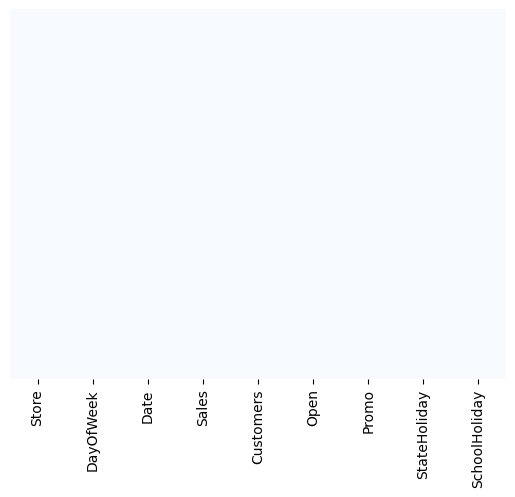

In [18]:
# Check missing values

sns.heatmap(sales_train_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

As we can see there are no missing values.

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>],
       [<Axes: title={'center': 'SchoolHoliday'}>, <Axes: >, <Axes: >]],
      dtype=object)

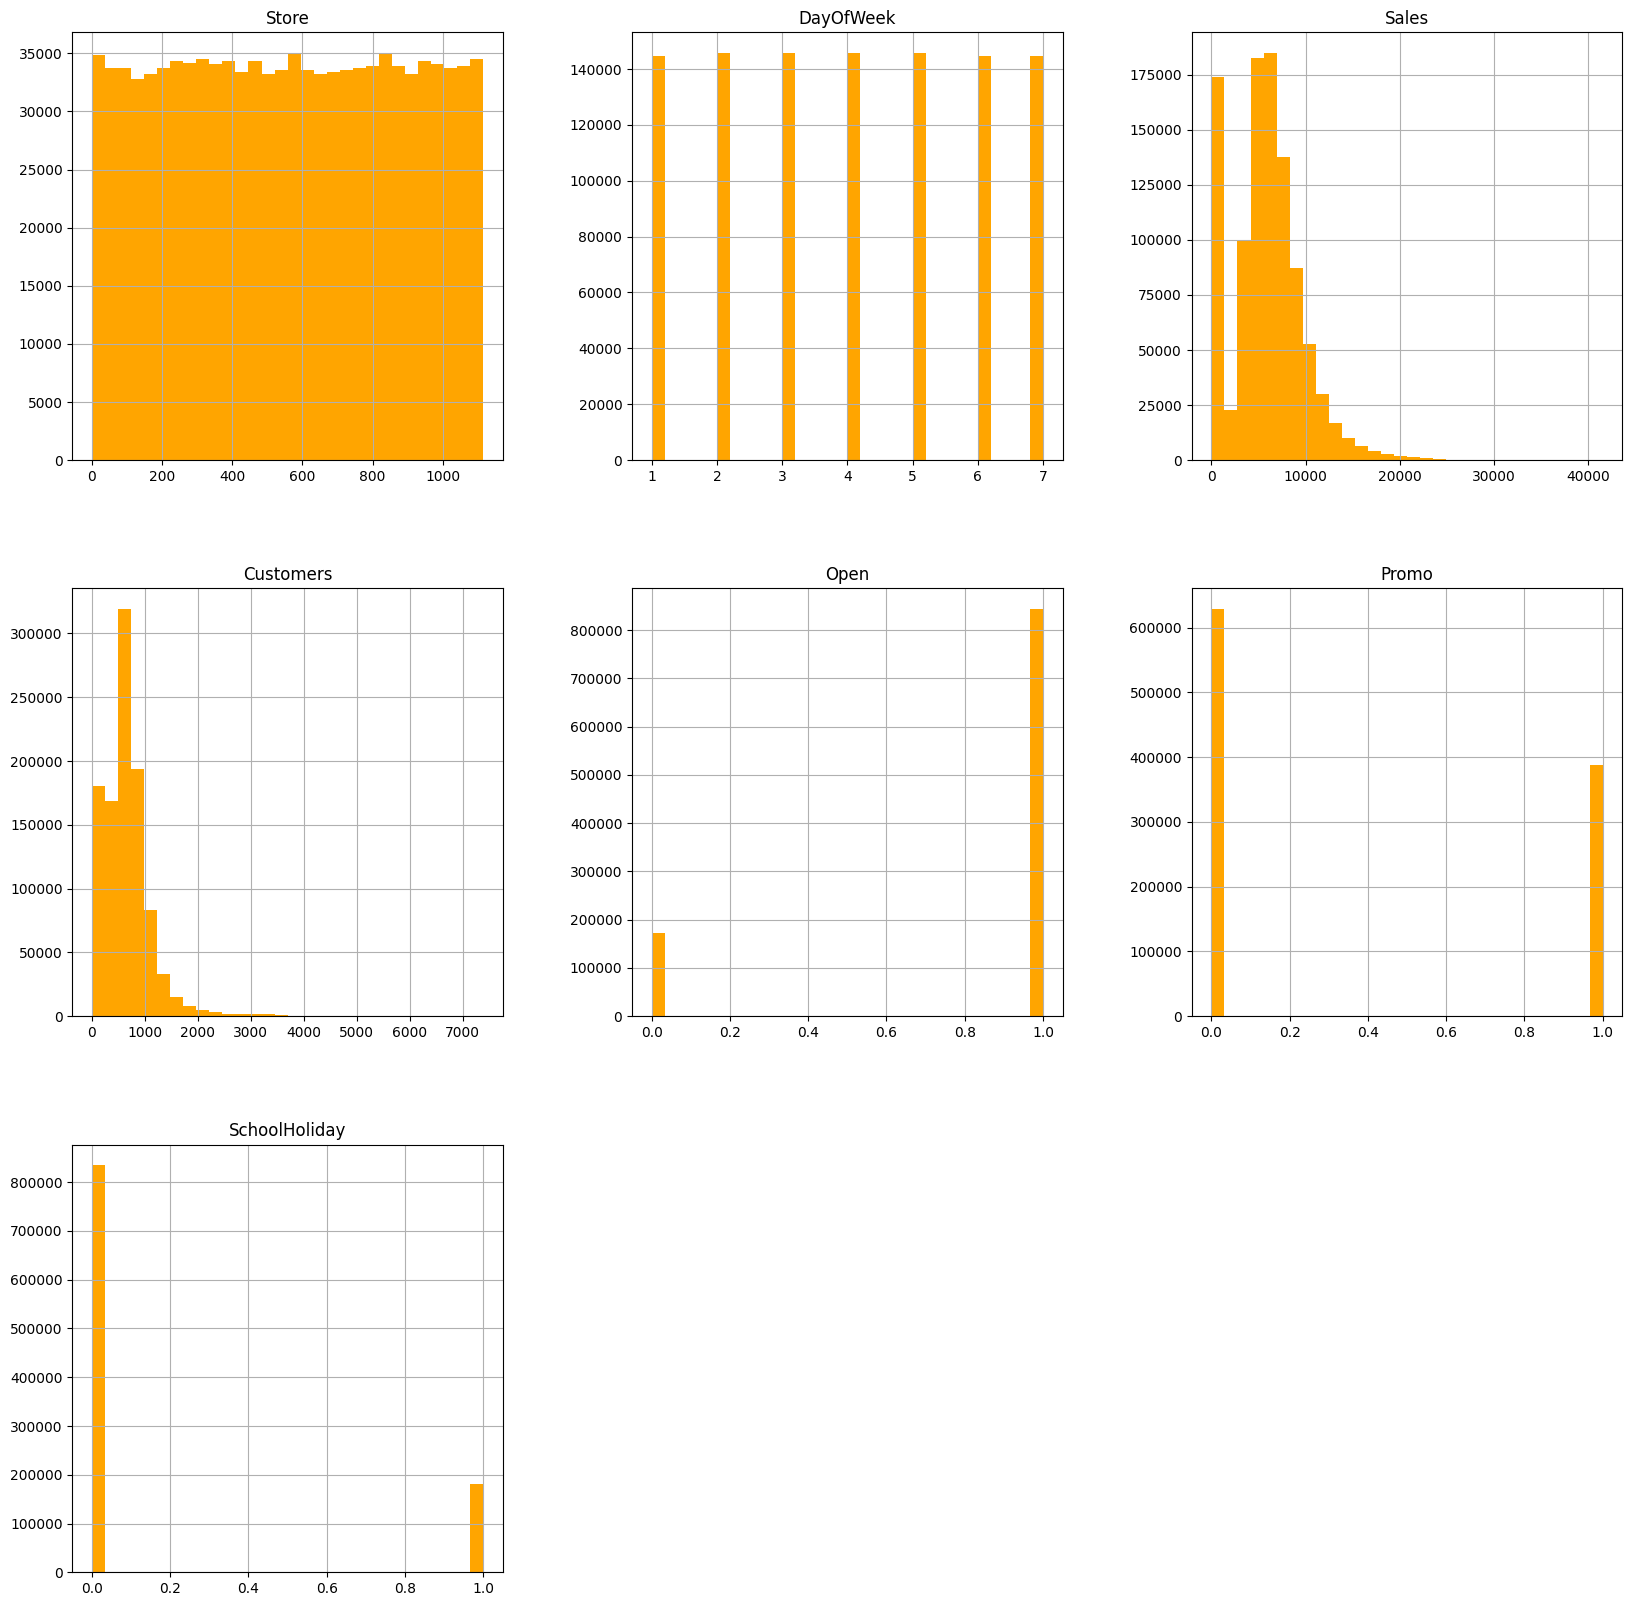

In [19]:
sales_train_df.hist(bins=30, figsize=(20, 20), color="Orange")

Observations: 

- Average 600 customers per day, maximum is 4500 but we can't see the outlier at 7388.
- Data is uniformly distributed across various day fo the week.
- Stores are open approximately more than 80% of the time.
- Data is equally distributed among all stores (no bias).
- Average sales is around 5000-6000 Euros.
- School Holidays are about 18%.

In [20]:
sales_train_df["Customers"].max()

7388

In [21]:
# How many stores are open and closed?

closed_train_df = sales_train_df[sales_train_df["Open"] == 0]
open_train_df = sales_train_df[sales_train_df["Open"] == 1]

In [22]:
# Count the number of stores that are open and closed.

print("Total=", len(sales_train_df))
print("Number of closed stores =", len(closed_train_df))
print("Number of open stores =", len(open_train_df))

Total= 1017209
Number of closed stores = 172817
Number of open stores = 844392


In [23]:
# We will only keep the open stores and remove the closed stores.

sales_train_df = sales_train_df[sales_train_df["Open"] == 1]

In [24]:
# Let's drop the open columns

sales_train_df.drop(["Open"], axis=1, inplace=True)

In [25]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1
1016827,733,2,2013-01-01,10765,2377,0,a,1
1016863,769,2,2013-01-01,5035,1248,0,a,1
1017042,948,2,2013-01-01,4491,1039,0,a,1


In [26]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


After dropping the columns where the stores were closed, the Average Sales went upto 6995. So did the Average number of Customers to 762. 

## Explore Stores Information Data

<Axes: >

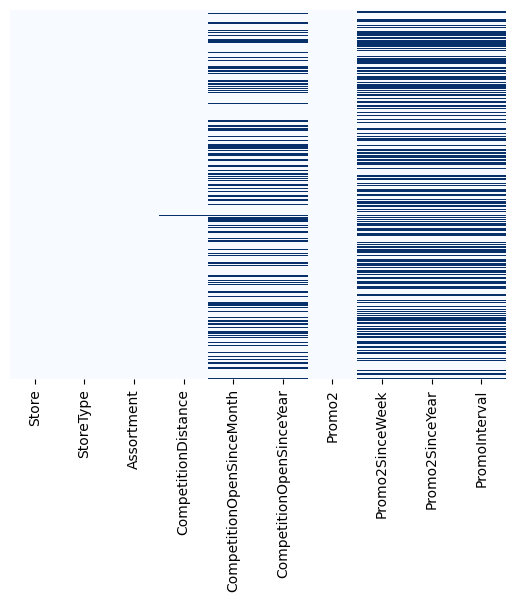

In [27]:
# Let's check for missing values

sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

- We have a lot of missing values in the Columns CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear and PromoInterval.
- It seems like CompetitionOpenSinceMonth and CompetitionOpenSinceYear shares the same null entries.
- While Promo2SinceWeek, Promo2SinceYear and PromoInterval shares the null entries too.
- CompetitionDistance has a very small amount of missing values.

In [28]:
# See the missing values in CompetitionDistance

store_info_df[store_info_df["CompetitionDistance"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


Only 3 rows are missing in CompetitionDistance

In [29]:
# Now, let's see the missin values in CompetitionOpenSinceMonth

store_info_df[store_info_df["CompetitionOpenSinceMonth"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


A total of 354 rows are missing in CompetitionOpenSinceMonth which is a lot of missing values.

In [30]:
# Let's see how many Promo2 are 0.

store_info_df[store_info_df["Promo2"] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


When Promo2 is zero, the rest of the variables related to Promo2 like Promo2SinceWeek, Promo2SinceYear and PromoInterval is also 0.

In [31]:
str_cols = [
    "Promo2SinceWeek",
    "CompetitionOpenSinceYear",
    "CompetitionOpenSinceMonth",
    "Promo2SinceYear",
    "PromoInterval",
]

In [32]:
#  Filling the null values in "Promo2SinceWeek","CompetitionOpenSinceYear","CompetitionOpenSinceMonth","Promo2SinceYear","PromoInterval" with Zero.

for str in str_cols:
    store_info_df[str].fillna(0, inplace=True)

/tmp/ipykernel_3881/4161767859.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_info_df[str].fillna(0, inplace=True)


In [33]:
# There are 3 rows that are msssing in CompetitionDistance, let's fill them up with average value of CompetitionDistance.

store_info_df["CompetitionDistance"].fillna(
    store_info_df["CompetitionDistance"].mean(), inplace=True
)

/tmp/ipykernel_3881/1940007931.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_info_df["CompetitionDistance"].fillna(


<Axes: >

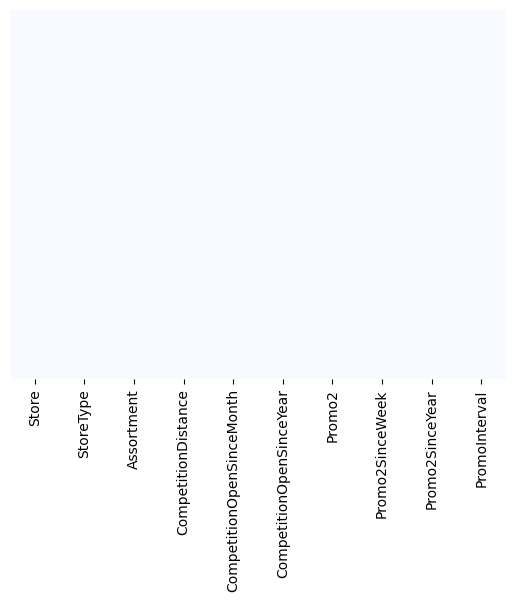

In [34]:
# Check the missing values again.

sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>],
       [<Axes: title={'center': 'Promo2SinceYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

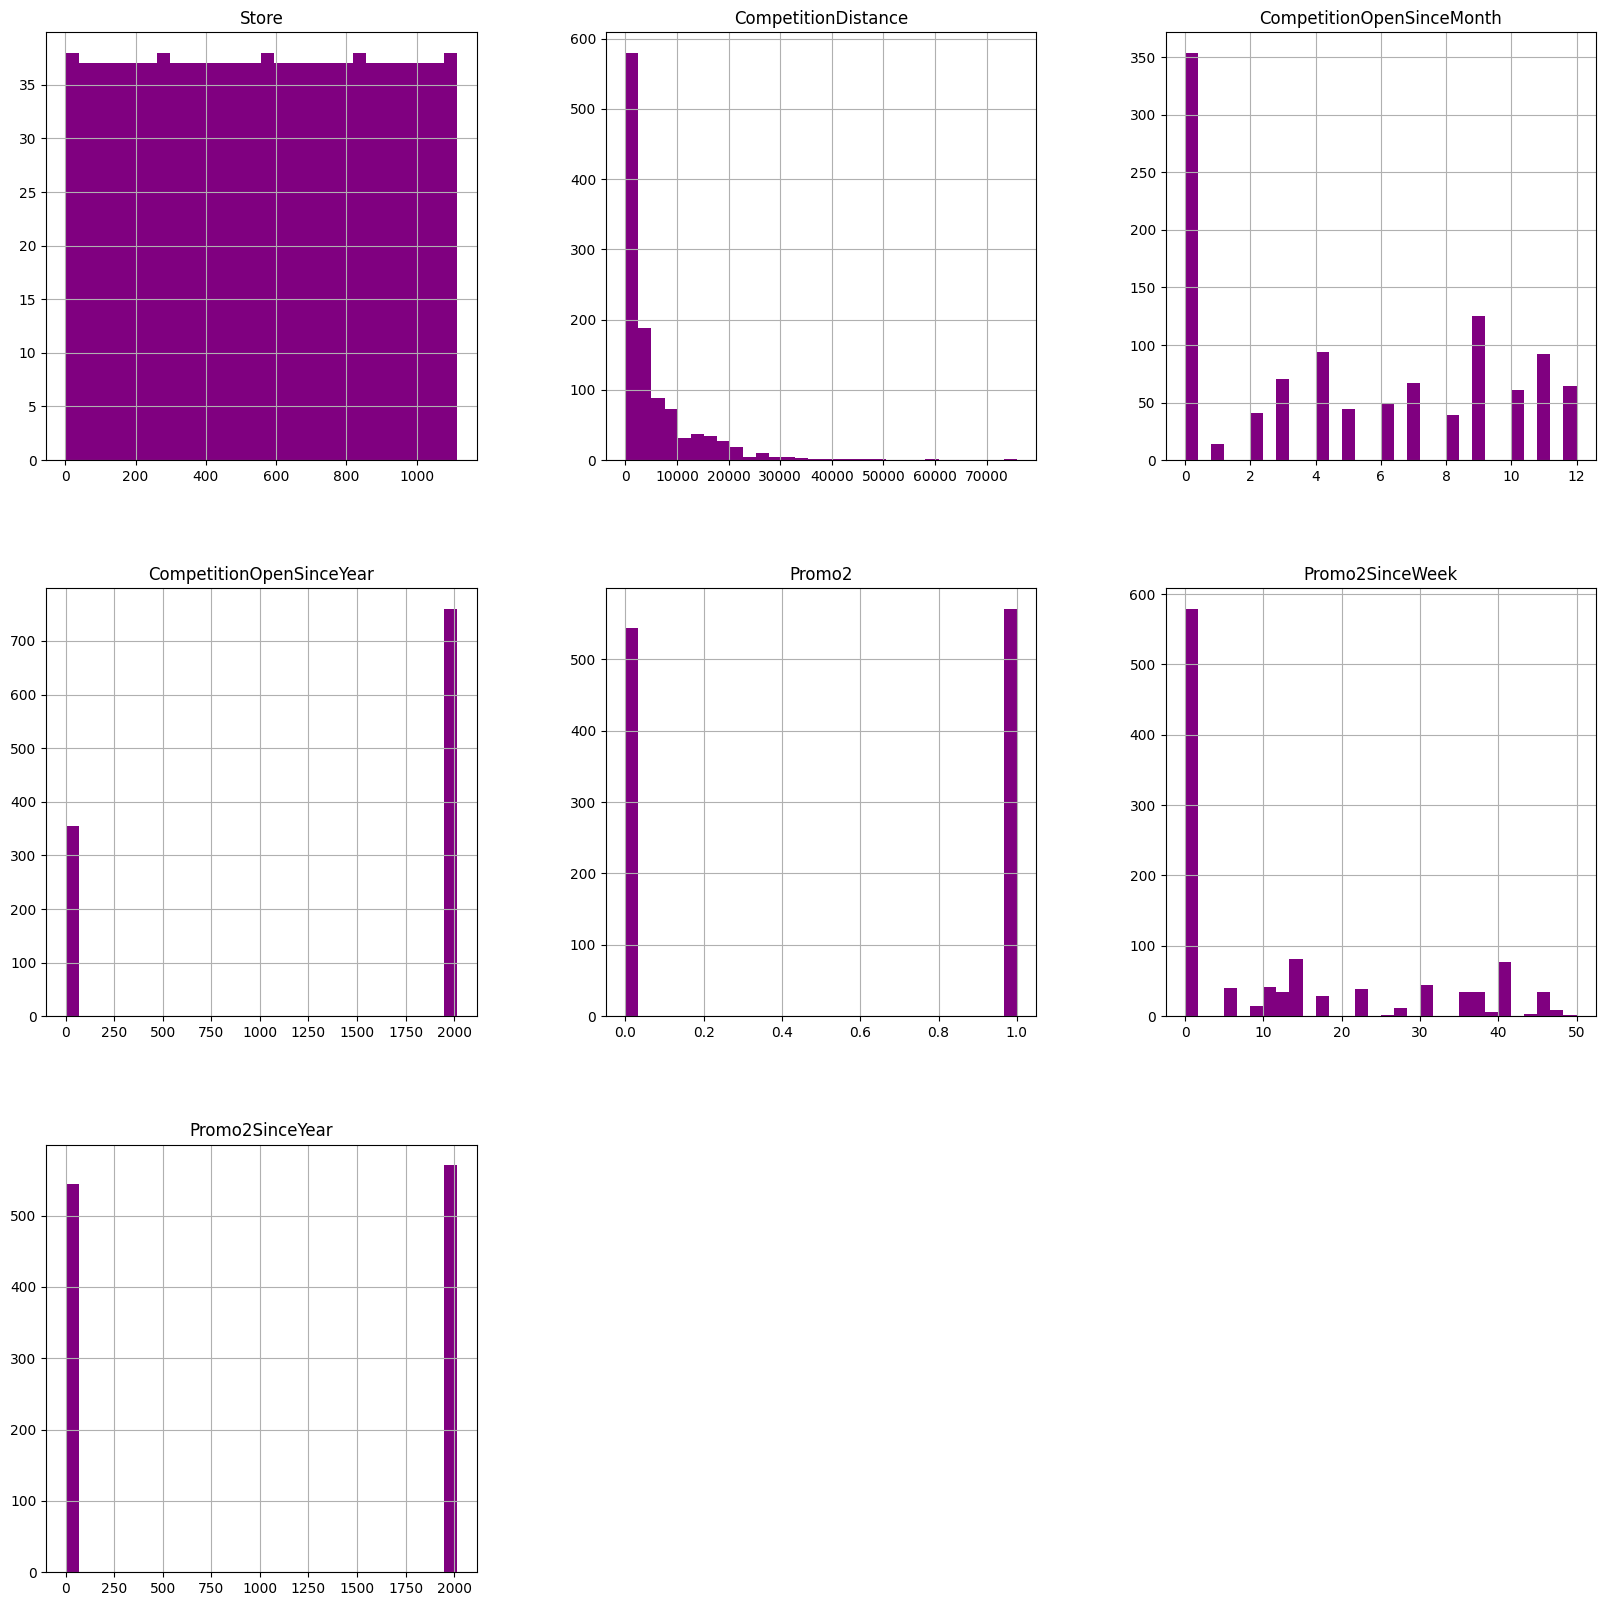

In [35]:
# Plotting Histogram of the features.

store_info_df.hist(bins=30, figsize=(20, 20), color="Purple")

- Half of the stores are involved in Promo2.
- Half of the stores have their competition at a distance of 0-3000m (3 kms away).
- The data is uniformly distributed in Store.

## Explore the Merged Data

In [36]:
# Let's merge both data frame together.

sales_train_all_df = pd.merge(sales_train_df, store_info_df, how="inner", on="Store")

In [37]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,150.0,9.0,2006.0,0,0.0,0.0,0
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.0,10.0,1999.0,0,0.0,0.0,0
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,1430.0,0.0,0.0,0,0.0,0.0,0


In [38]:
# Let's check the correlation of the merged data

sales_train_all_df_numeric = sales_train_all_df.select_dtypes(include="number")
correlations = sales_train_all_df_numeric.corr()["Sales"].sort_values()
correlations

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

<Axes: >

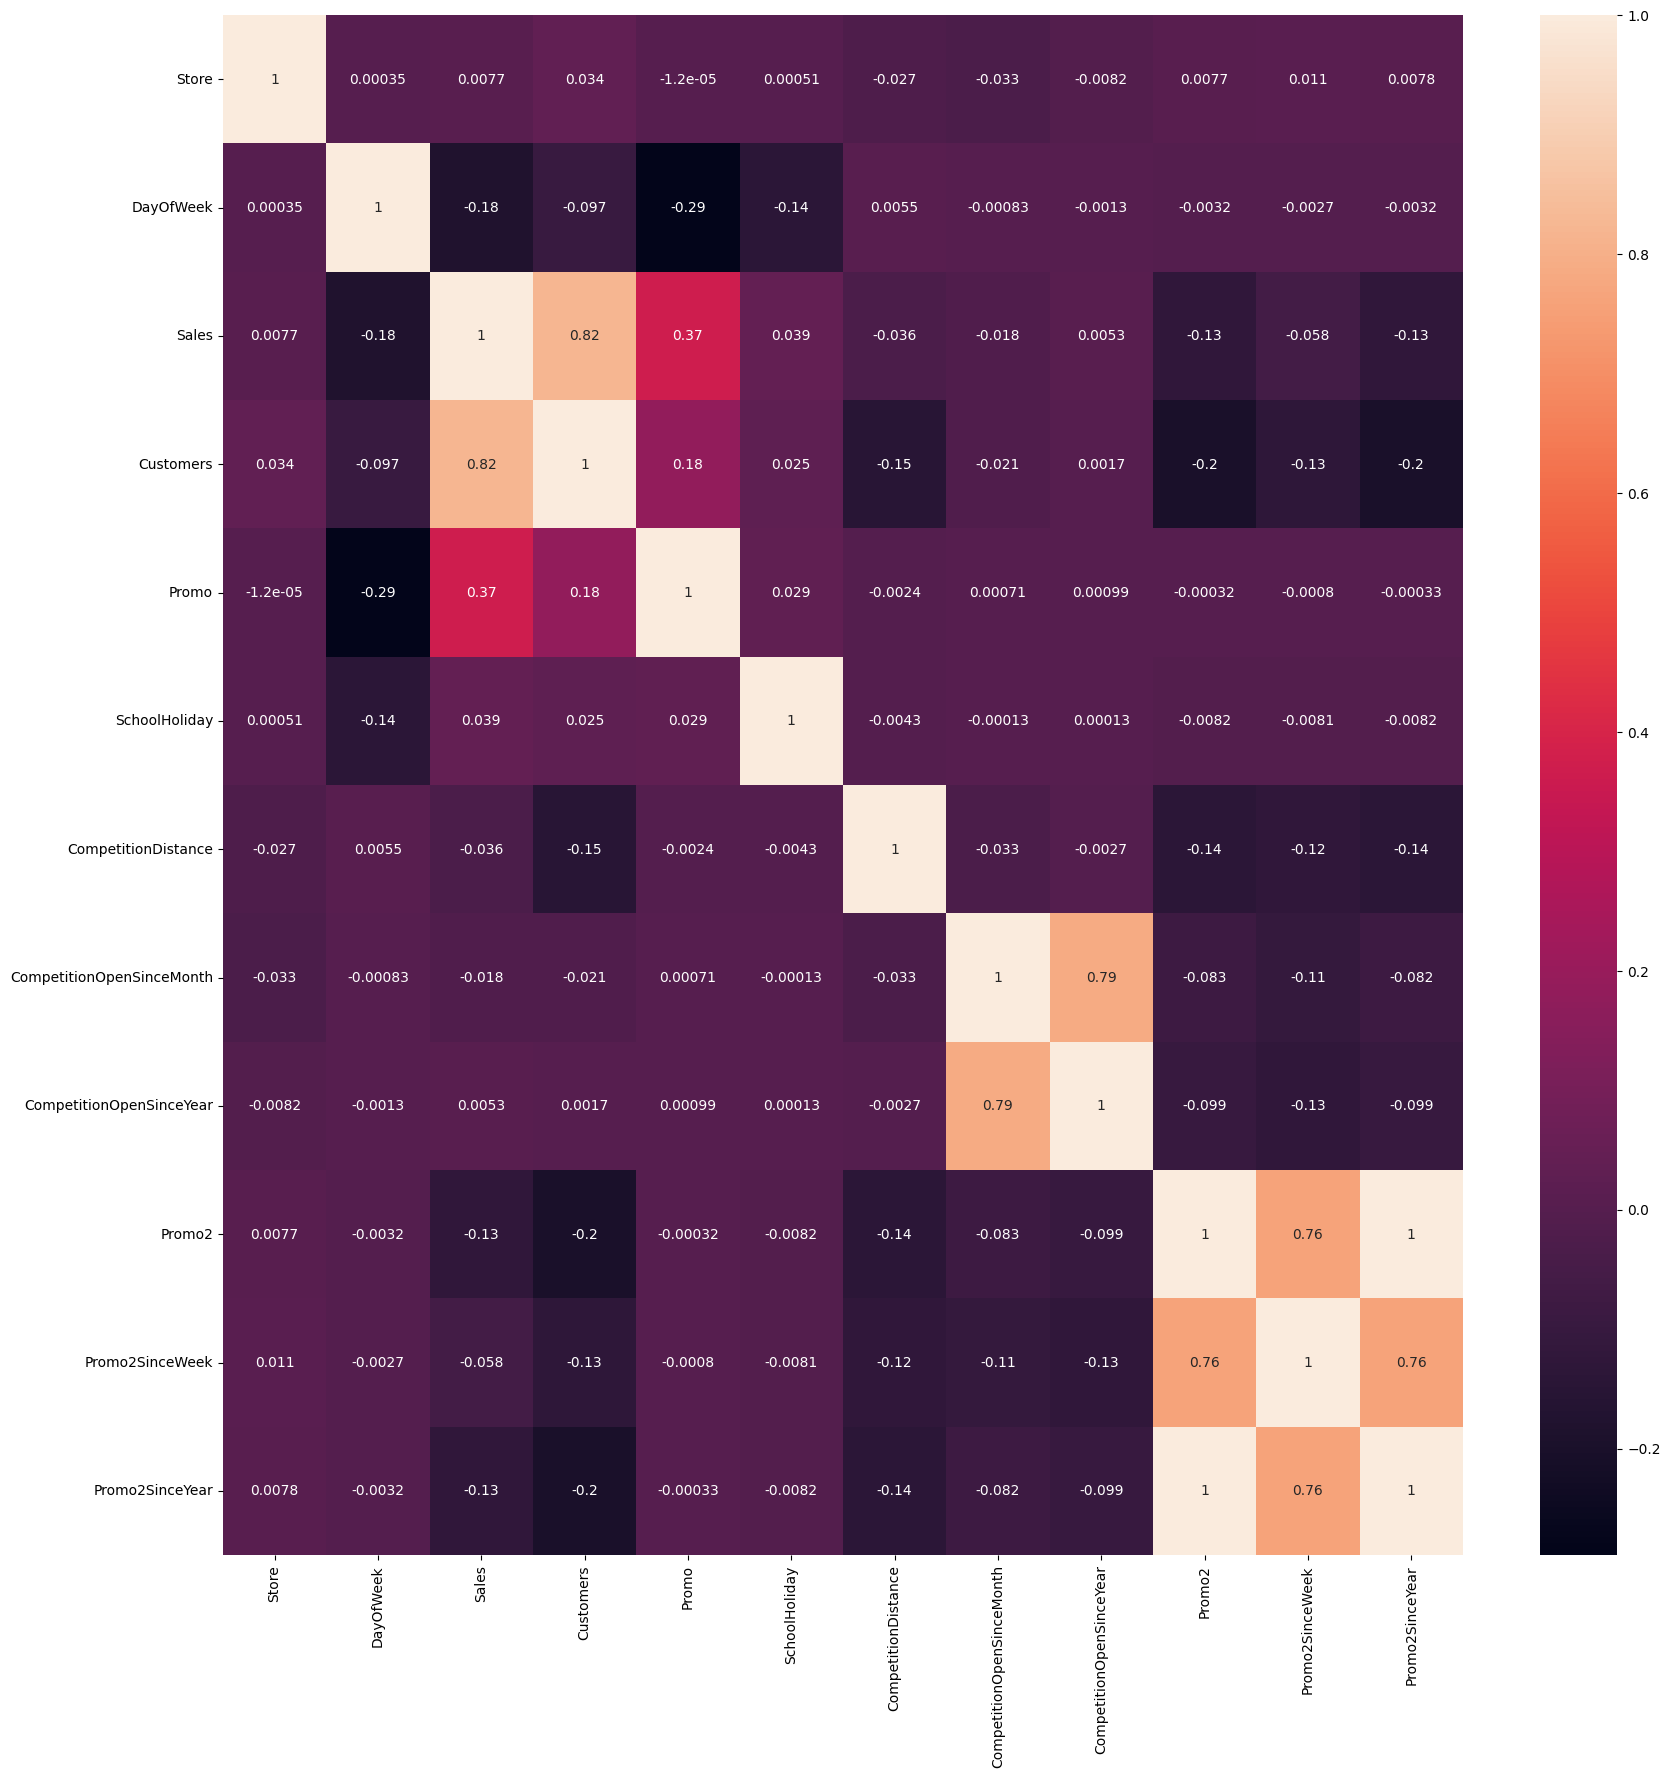

In [39]:
# Plotting a heatmap.

correlations = sales_train_all_df_numeric.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, annot=True)

Key highlights:

- Sales and Customers: There is a strong positive correlation (0.82) between sales and the number of customers, indicating that as sales increase, so does customer traffic.
- Promo2 and Sales/Customers: There is a negative correlation between Promo2 and both sales and customers (-0.13 for sales, -0.20 for customers), indicating that stores participating in Promo2 tend to have slightly lower sales and fewer customers. However, these correlations are relatively weak compared to other factors..
- Competition Distance and Sales/Customers: There is a weak negative correlation between competition distance and both sales and customers (-0.04 for sales, -0.15 for customers), implying that stores located closer to competitors may experience slightly lower sales and customer traffic.
- Competition Open Since Year and Month: There is a very weak negative correlation between the year/month when competitors opened and both sales and customers, suggesting that the timing of competitor store openings has minimal impact on sales and customer numbers.

In [40]:
# Let's separate the Year, Month and Day.

sales_train_all_df["Year"] = pd.DatetimeIndex(sales_train_all_df["Date"]).year
sales_train_all_df["Month"] = pd.DatetimeIndex(sales_train_all_df["Date"]).month
sales_train_all_df["Day"] = pd.DatetimeIndex(sales_train_all_df["Date"]).day

In [41]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,150.0,9.0,2006.0,0,0.0,0.0,0,2013,1,1
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.0,10.0,1999.0,0,0.0,0.0,0,2013,1,1
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,1430.0,0.0,0.0,0,0.0,0.0,0,2013,1,1


Text(0.5, 1.0, 'Average Customer per Month')

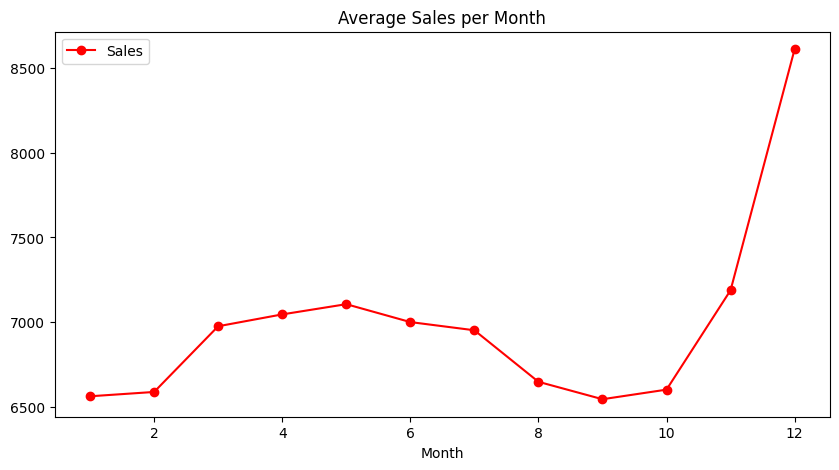

<Figure size 640x480 with 0 Axes>

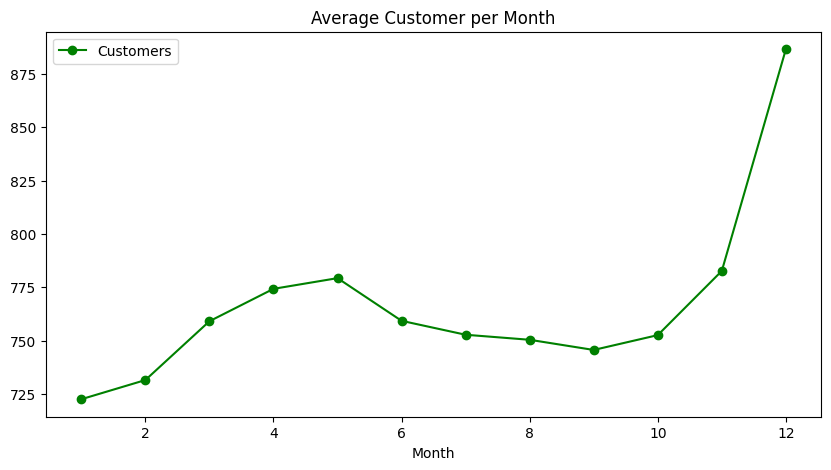

In [42]:
# Let's take a look at the average sales and the number of customers per month.

axis = (
    sales_train_all_df.groupby("Month")[["Sales"]]
    .mean()
    .plot(figsize=(10, 5), marker="o", color="r")
)
axis.set_title("Average Sales per Month")

plt.figure()

axis = (
    sales_train_all_df.groupby("Month")[["Customers"]]
    .mean()
    .plot(figsize=(10, 5), marker="o", color="g")
)
axis.set_title("Average Customer per Month")

The Sales and no. of Customers peak around the Christmas time.

Text(0.5, 1.0, 'Average Customer per Day of the Month')

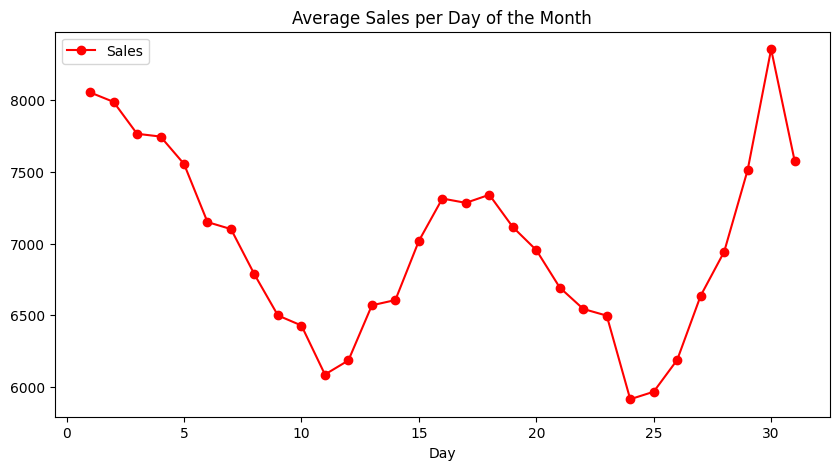

<Figure size 640x480 with 0 Axes>

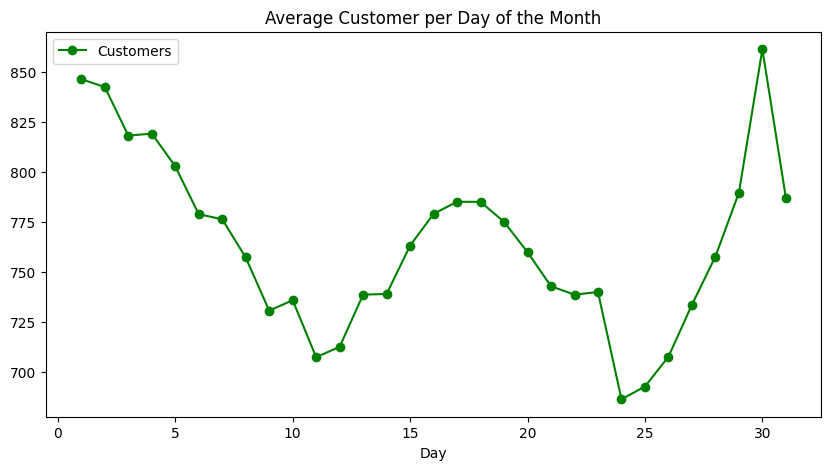

In [43]:
# Let's take a look at the average sales and the number of customers per Day of the Month now.

axis = (
    sales_train_all_df.groupby("Day")[["Sales"]]
    .mean()
    .plot(figsize=(10, 5), marker="o", color="r")
)
axis.set_title("Average Sales per Day of the Month")

plt.figure()

axis = (
    sales_train_all_df.groupby("Day")[["Customers"]]
    .mean()
    .plot(figsize=(10, 5), marker="o", color="g")
)
axis.set_title("Average Customer per Day of the Month")

- Minimum number of the customers are on 24th of the month.
- Maximum number of the customers are during the end of the month (30th).
- The trend is fluctuating throughout, it's high in the starting of the month, goes down on 11th, peaks again around 16th and hits the rock bottom on 24th and finally hits the saturation point at 30th.

Text(0.5, 1.0, 'Average Customer per Day of Week')

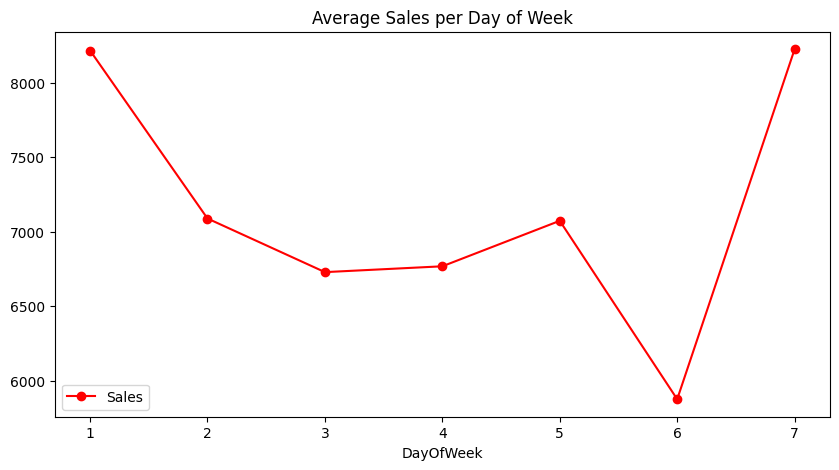

<Figure size 640x480 with 0 Axes>

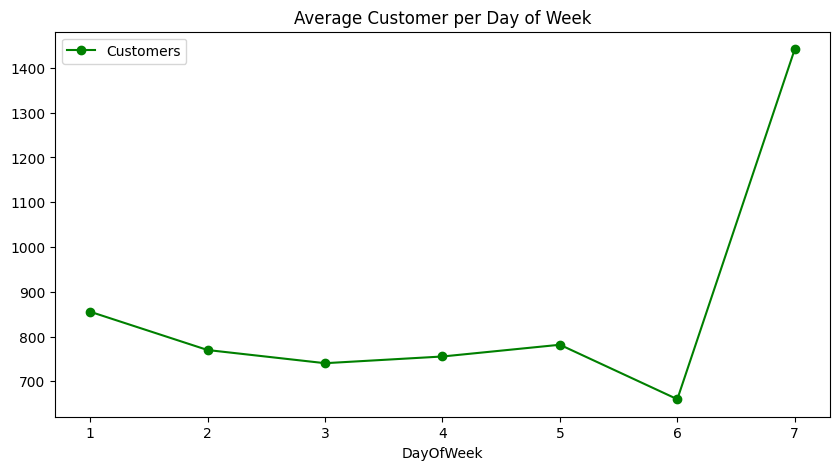

In [44]:
# Let's take a look at the average sales and the number of customers per Day of week now ( 7 is Sunday).

axis = (
    sales_train_all_df.groupby("DayOfWeek")[["Sales"]]
    .mean()
    .plot(figsize=(10, 5), marker="o", color="r")
)
axis.set_title("Average Sales per Day of Week")

plt.figure()

axis = (
    sales_train_all_df.groupby("DayOfWeek")[["Customers"]]
    .mean()
    .plot(figsize=(10, 5), marker="o", color="g")
)
axis.set_title("Average Customer per Day of Week")


- Maximum Sales:
  - Monday and Sunday observe the highest sales figures.
  - This indicates that these two days of the week witness increased consumer spending.
- Maximum Customers:
  - Sunday records the highest number of customers.
- Minimum Sales and Customers:
  - Saturday experiences the lowest sales and customer numbers.
  - This implies that Saturday might be a slower day for sales and customer activity compared to other days of the week.

<Axes: xlabel='Date'>

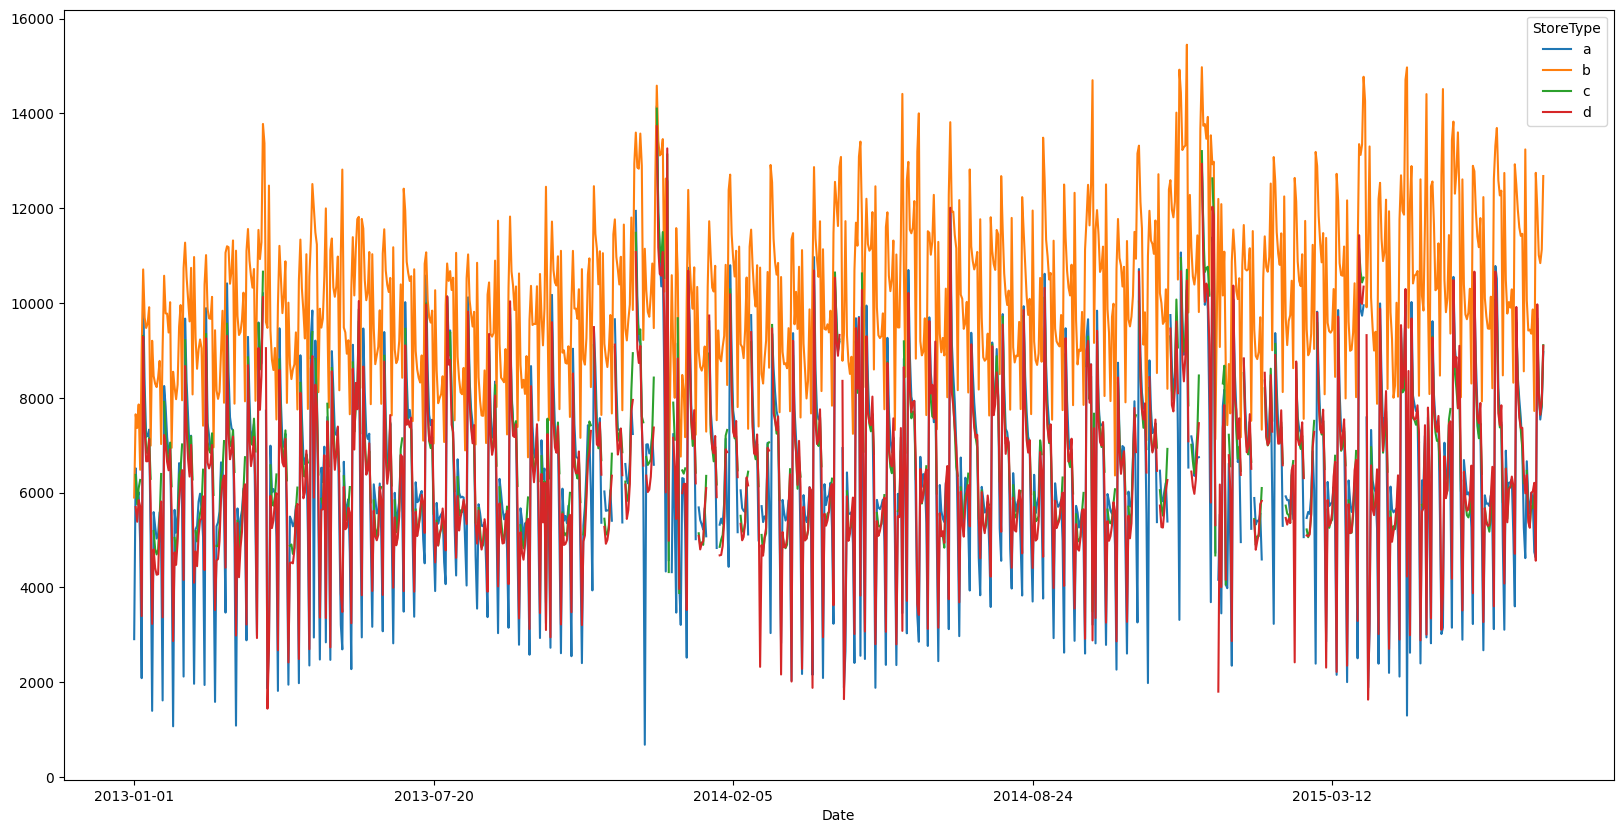

In [45]:
# Let's plot the heatmap now.

fig, ax = plt.subplots(figsize=(20, 10))
sales_train_all_df.groupby(["Date", "StoreType"])["Sales"].mean().unstack().plot(ax=ax)

<Axes: xlabel='Promo', ylabel='Customers'>

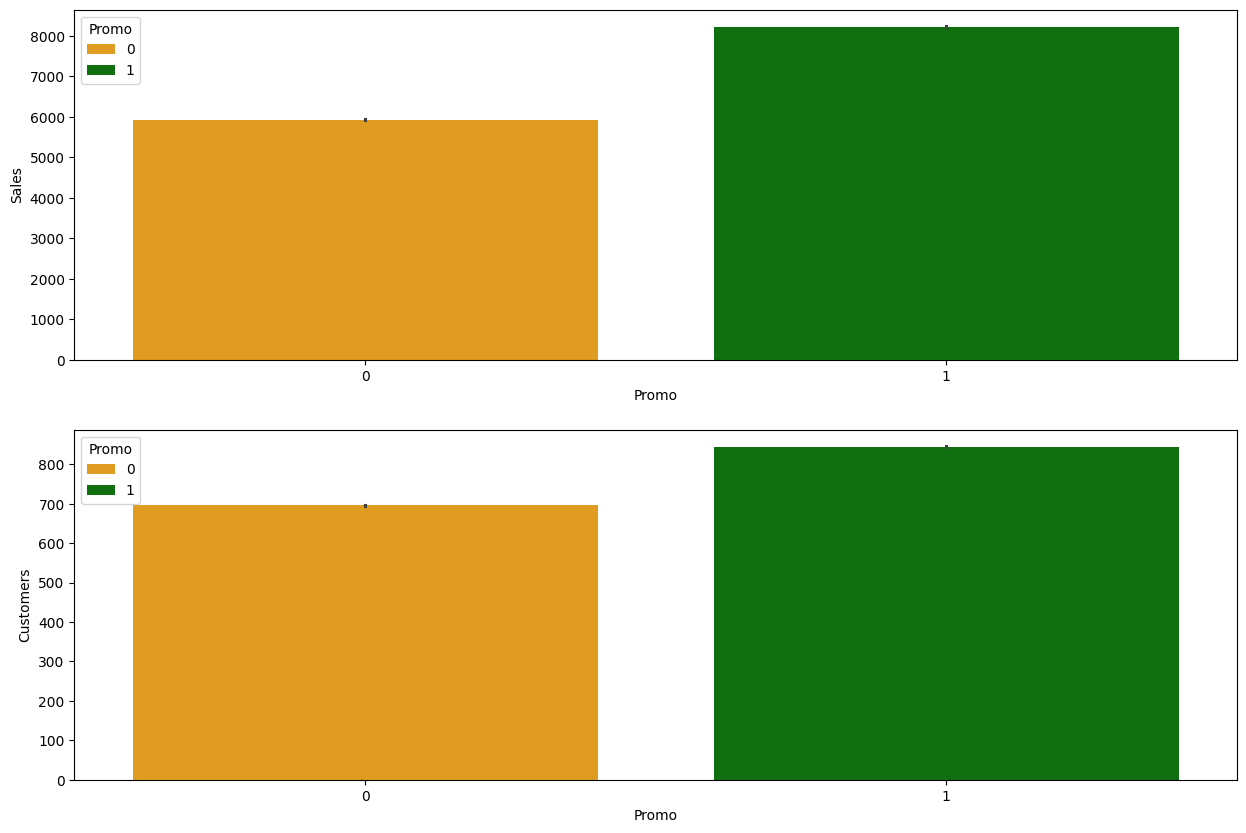

In [46]:
# Creating two subplots, each displaying a bar plot of "Sales" and "Customers" data from the sales_train_all_df.

plt.figure(figsize=(15, 10))

plt.subplot(211)
sns.barplot(
    x="Promo",
    y="Sales",
    data=sales_train_all_df,
    hue="Promo",
    palette={0: "orange", 1: "green"},
)

plt.subplot(212)
sns.barplot(
    x="Promo",
    y="Customers",
    data=sales_train_all_df,
    hue="Promo",
    palette={0: "orange", 1: "green"},
)

Promo is effective with higher level of Sales and Customers.

<Axes: xlabel='Promo', ylabel='Customers'>

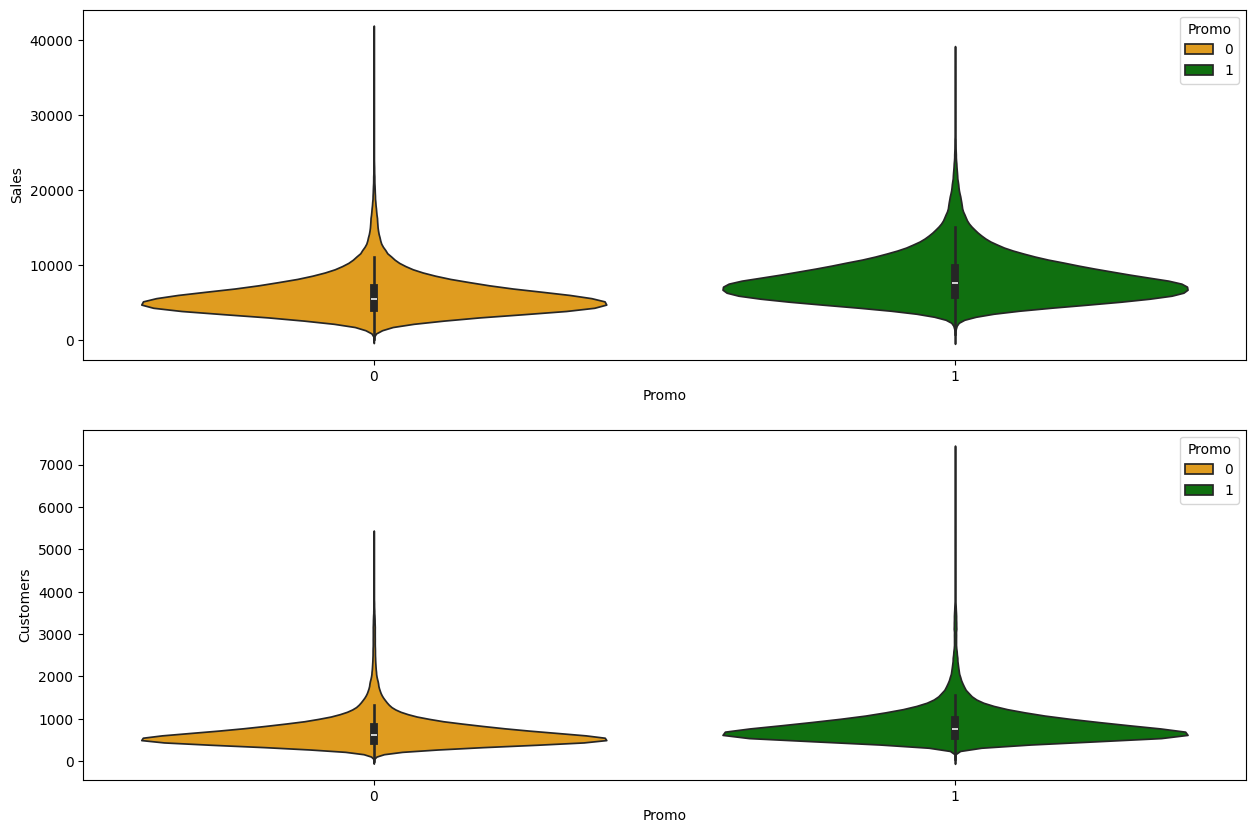

In [47]:
# Creating two Violin plots, each displaying a bar plot of "Sales" and "Customers" data from the sales_train_all_df.

plt.figure(figsize=(15, 10))

plt.subplot(211)
sns.violinplot(
    x="Promo",
    y="Sales",
    data=sales_train_all_df,
    hue="Promo",
    palette={0: "orange", 1: "green"},
)

plt.subplot(212)
sns.violinplot(
    x="Promo",
    y="Customers",
    data=sales_train_all_df,
    hue="Promo",
    palette={0: "orange", 1: "green"},
)

- Considering outliers there isn't much of a difference for Sales. Distribution is higher but not significantly with respect to outliers. The max is equivalent.
- We note a lot more customer outlyers with Promo however, ~2000 more customers than max of no promo.

# Facebook Prophet

Facebook is an open source software released by Facebook's Core Data Science Team. It's a procedure for forecasting time-series data based on an additive model where non-linear ttends are fit with yearly, weekly and daily seasonality, plus holiday effects. 

## Train the Model (A)

In [48]:
# Import Prophet

from prophet import Prophet

In [58]:
def sales_predictions(store_id, sales_df, periods):
    sales_df = sales_df[sales_df["Store"] == store_id]
    sales_df = sales_df[["Date", "Sales"]].rename(columns={"Date": "ds", "Sales": "y"})
    sales_df = sales_df.sort_values("ds")

    model = Prophet()
    model.fit(sales_df)
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    figure = model.plot(forecast, xlabel="Date", ylabel="Sales")
    figure2 = model.plot_components(forecast)

17:12:26 - cmdstanpy - INFO - Chain [1] start processing
17:12:27 - cmdstanpy - INFO - Chain [1] done processing
/home/barshadeb/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/barshadeb/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/home/barshadeb/.local/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, 

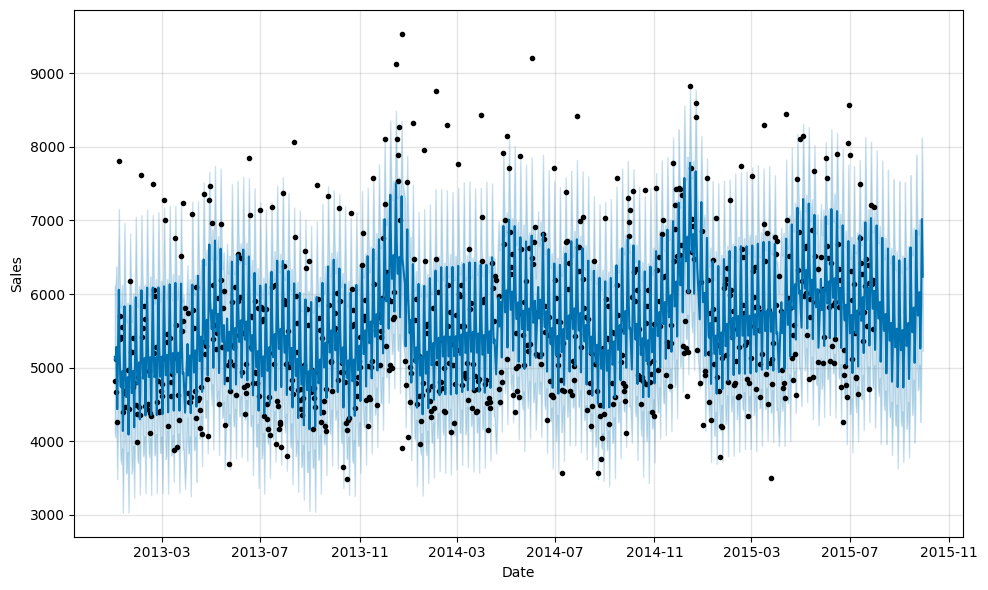

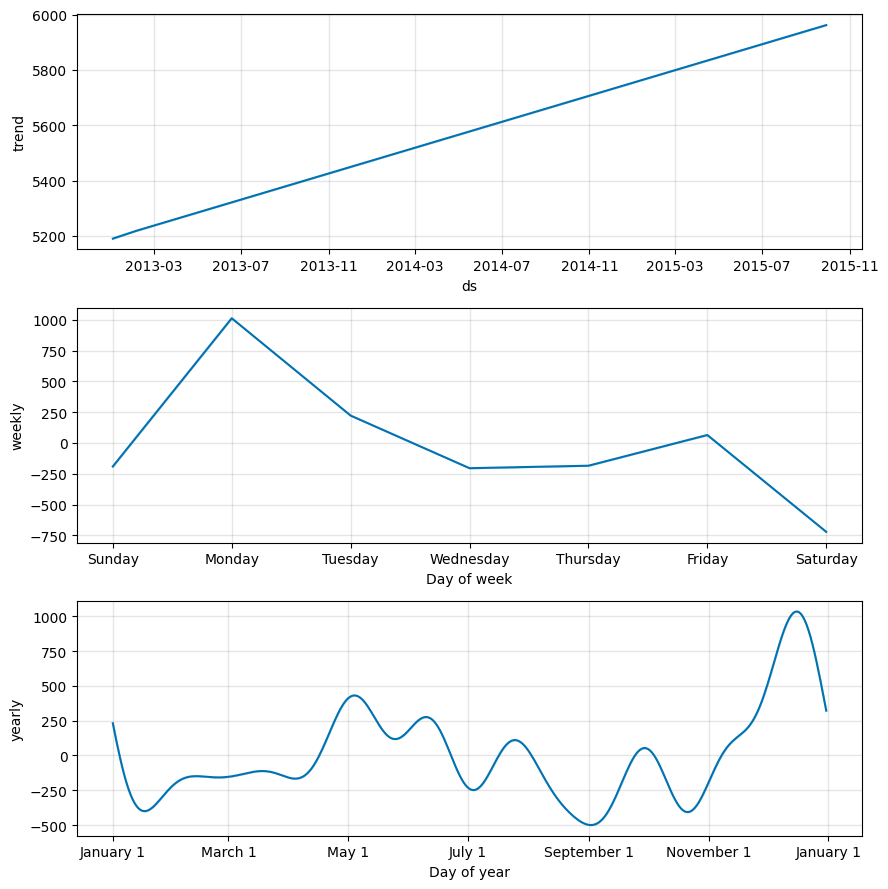

In [59]:
sales_predictions(10, sales_train_all_df, 60)

- The trend is an upward trend, steadilu going upwards.
- For weekly sales forecast, it's predicting Monday has the highest sales while Saturday has the lowest.
- For yearly sales forecast, the trend is fluctuating throughout the year marking the peak in December and the rock- bottom at around September.

## Train the model (B)

- StateHoliday: Indicates a holiday, normally all stores with few exceptions which are closed onState holidays.
  - NOTE: All schools are closed in public Holidays and weekends. a = Public holiday, b= Easter holiday, c= Christmas, 0 = None.
- SchoolHoliday: Indicates if the (Store,Date) was affected ny the closure of Public schools.

In [62]:
# Predicting prediction for store number 6 for 90 days.


def sales_predictions(store_id, sales_df, holidays, periods):
    sales_df = sales_df[sales_df["Store"] == store_id]
    sales_df = sales_df[["Date", "Sales"]].rename(columns={"Date": "ds", "Sales": "y"})
    sales_df = sales_df.sort_values("ds")

    model = Prophet(holidays=holidays)
    model.fit(sales_df)
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    figure = model.plot(forecast, xlabel="Date", ylabel="Sales")
    figure2 = model.plot_components(forecast)

In [61]:
# Get all the dates with school holidays.

school_holidays = (
    sales_train_all_df[sales_train_all_df["SchoolHoliday"] == 1].loc[:, "Date"].values
)

school_holidays.shape

(163457,)

In [78]:
# Get all the dates with state holidays.

state_holidays = (
    sales_train_all_df[
        (sales_train_all_df["StateHoliday"] == "a")
        | (sales_train_all_df["StateHoliday"] == "b")
        | (sales_train_all_df["StateHoliday"] == "c")
    ]
    .loc[:, "Date"]
    .values
)

state_holidays.shape

(910,)

In [79]:
state_holidays = pd.DataFrame(
    {"ds": pd.to_datetime(state_holidays), "holiday": "state_holidays"}
)

state_holidays

,ds,holiday
0,2015-06-04,state_holidays
1,2015-06-04,state_holidays
2,2015-06-04,state_holidays
3,2015-06-04,state_holidays
4,2015-06-04,state_holidays
...,...,...
905,2013-01-01,state_holidays
906,2013-01-01,state_holidays
907,2013-01-01,state_holidays
908,2013-01-01,state_holidays


In [80]:
school_holidays = pd.DataFrame(
    {"ds": pd.to_datetime(school_holidays), "holiday": "school_holidays"}
)

school_holidays

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

In [ ]:
# Concatenate both school and sate holidays.

school_state_holidays = pd.concat((state_holidays, school_holidays))

In [ ]:
school_state_holidays

,ds,holiday
0,2015-07-31,state_holidays
1,2015-07-31,state_holidays
2,2015-07-31,state_holidays
3,2015-07-31,state_holidays
4,2015-07-31,state_holidays
...,...,...
163452,2013-01-01,school_holidays
163453,2013-01-01,school_holidays
163454,2013-01-01,school_holidays
163455,2013-01-01,school_holidays


18:17:15 - cmdstanpy - INFO - Chain [1] start processing
18:17:16 - cmdstanpy - INFO - Chain [1] done processing
/home/barshadeb/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/barshadeb/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/home/barshadeb/.local/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, 

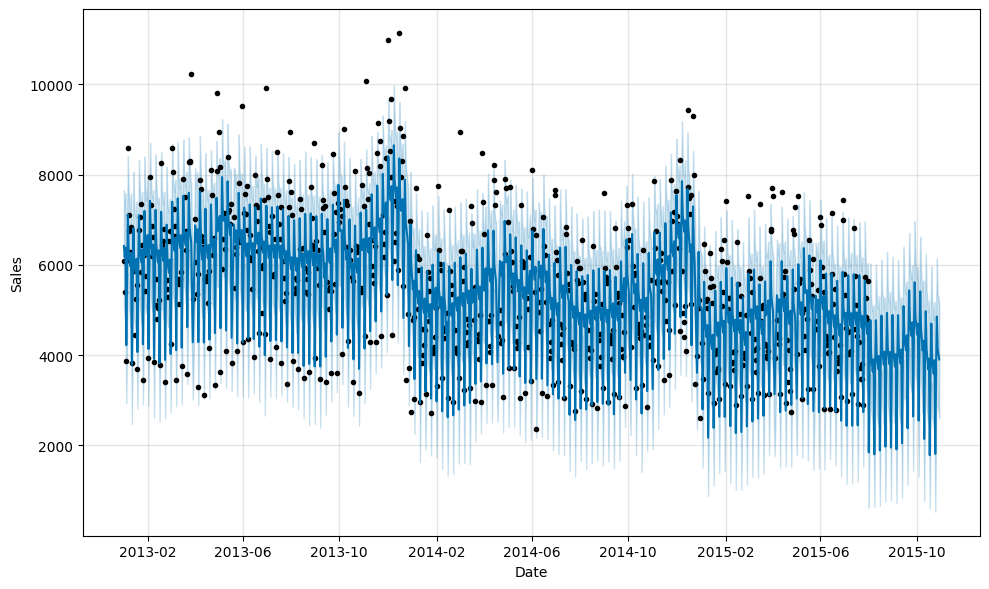

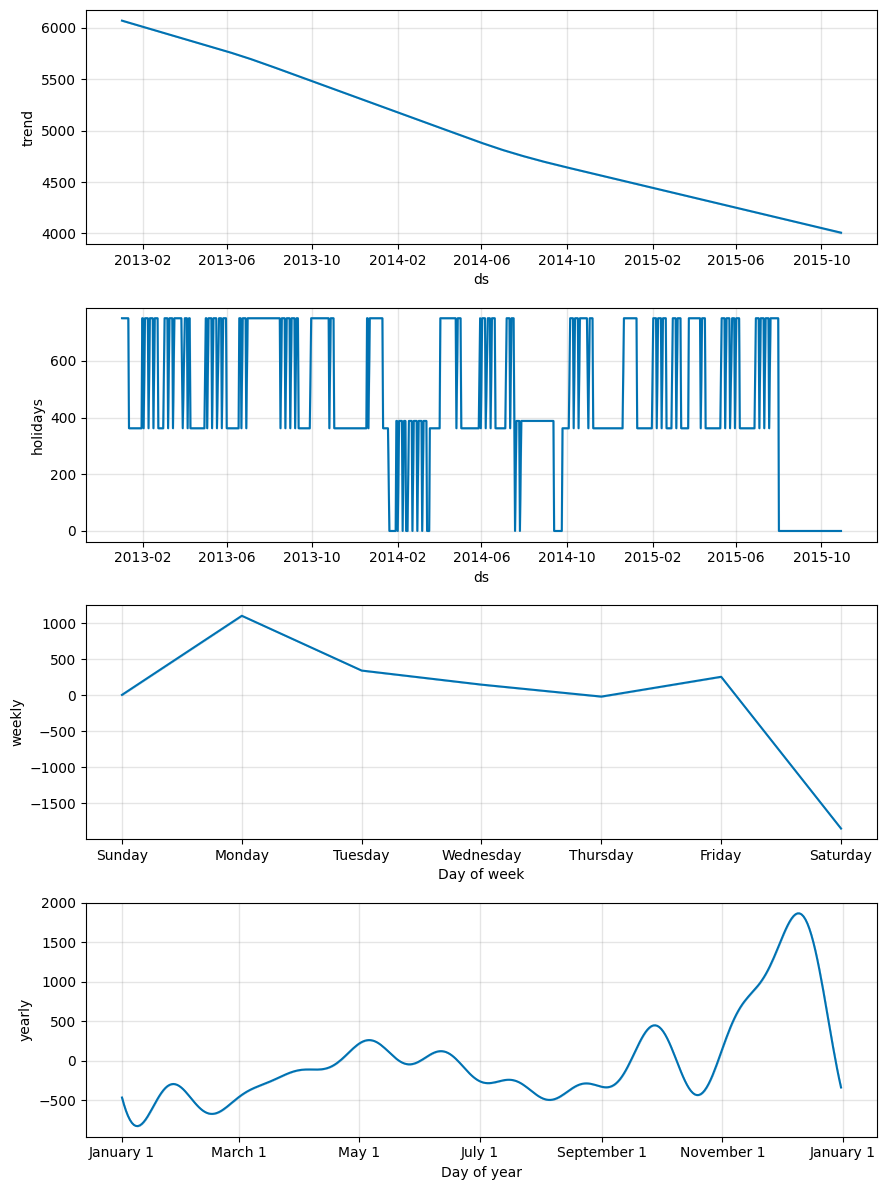

In [81]:
# Let's make prediction for store 6.

sales_predictions(6, sales_train_all_df, school_state_holidays, 90)